# Leitura de imagem colorida

Uma imagem colorida possui 3 canais: vermelho, verde e azul. Adicionalmente, muitos formatos de imagens também armazenam um quarto canal: transparência, que são valores indicando o nível de transparência do pixel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('flower.tiff')
print(img.shape)
print(np.min(img), np.max(img))

(755, 800, 4)
0 255


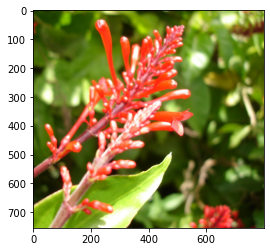

In [2]:
plt.imshow(img)

#### Visualizando cada canal de cor separadamente

Text(0.5, 1.0, 'Azul')

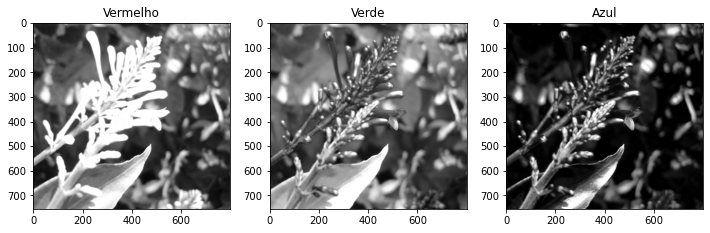

In [5]:
img_red = img[:,:,0]     # Canal vermelho
img_green = img[:,:,1]   # Canal verde
img_blue = img[:,:,2]    # Canal azul

plt.figure(figsize=[12, 4])
plt.subplot(1, 3, 1)
plt.imshow(img_red, 'gray', vmin=0, vmax=255)  # vmin define o valor associado ao preto e vmax o valor da cor branca
plt.title('Vermelho')
plt.subplot(1, 3, 2)
plt.imshow(img_green, 'gray', vmin=0, vmax=255)
plt.title('Verde')
plt.subplot(1, 3, 3)
plt.imshow(img_blue, 'gray', vmin=0, vmax=255)
plt.title('Azul')

Podemos trabalhar separadamente com cada canal da imagem.

### Conversão de imagem colorida para nível de cinza

Se quisermos converter a imagem para níveis de cinza, utilizamos a fórmula

img_gray = 0.299\*img_red + 0.587\*img_green + 0.114\*img_blue

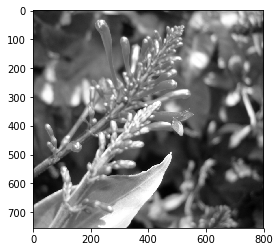

In [4]:
def rgb2gray(img):
    img_gray = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    return img_gray

img_gray = rgb2gray(img)
plt.imshow(img_gray, 'gray')

# Formatos de imagem

Diferentes formatos podem armazenar imagens de forma ligeiramente diferentes. 

In [27]:
def image_info(img):
    
    print(f'Tamanho: {img.shape}\n',
          f'Tipo de dado: {img.dtype}\n',
          f'Menor valor: {img.min()}\n',
          f'Maior valor: {img.max()}\n',
          f'Valores únicos: {len(np.unique(img))}', sep='')
    

In [30]:
img = plt.imread('flower.tiff')
print('tiff')
image_info(img)

img = plt.imread('flower.jpg')
print('\njpg')
image_info(img)

img = plt.imread('flower.png')
print('\npng')
image_info(img)

tiff
Tamanho: (755, 800, 4)
Tipo de dado: uint8
Menor valor: 0
Maior valor: 255
Valores únicos: 256

jpg
Tamanho: (755, 800, 3)
Tipo de dado: uint8
Menor valor: 0
Maior valor: 255
Valores únicos: 256

png
Tamanho: (755, 800, 3)
Tipo de dado: float32
Menor valor: 0.0
Maior valor: 1.0
Valores únicos: 256


O formato png armazena a imagem com valores entre 0 e 1. Podemos trabalhar com os pixels nesse intervalo de valores ou então converter a imagem para valores inteiros no intervalo [0,255] fazendo

In [6]:
img_255 = np.round(255*img).astype(np.uint8)

Diferentes programas de processamento de imagem podem salvar a imagem em diferentes padrões, mesmo que elas estejam no mesmo formato. Por exemplo:

In [42]:
img1 = plt.imread('flower_grayscale1.tiff')
print('img1')
image_info(img1)

img2 = plt.imread('flower_grayscale2.tiff')
print('\nimg2')
image_info(img2)

img1
Tamanho: (755, 800, 4)
Tipo de dado: uint8
Menor valor: 6
Maior valor: 255
Valores únicos: 250

img2
Tamanho: (755, 800)
Tipo de dado: uint8
Menor valor: 6
Maior valor: 255
Valores únicos: 250


# Mapeamento de intensidades automático do matplotlib

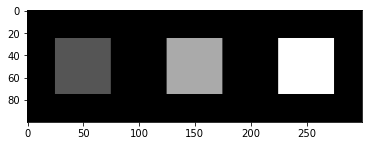

In [35]:
img = np.zeros([100, 300])

# Vamos criar 3 quadrados com valores diferentes
img[25:75, 25:75] = 20
img[25:75, 125:175] = 40
img[25:75, 225:275] = 60
plt.imshow(img, cmap='gray')

Na imagem acima o matplotlib associou o valor 0 com a cor preta e o valor 60 com a cor branca. Feito isso, ele mapeou os valores intermediários para intensidades entre o preto e o branco. Podemos visualizar como foi feito esse mapeamento utilizando o comando plt.colorbar().

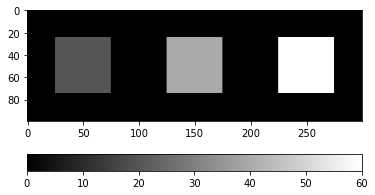

In [38]:
plt.imshow(img, cmap='gray')
plt.colorbar(orientation='horizontal')

Mas na maioria das vezes nós não queremos isso. Queremos que o valor 0 represente preto e 255 represente o branco. Para isso, utilizamos os parâmetros vmin e vmax.

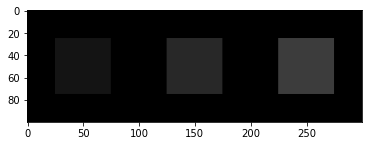

In [40]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

Note que esse remapeamento não acontece para imagens coloridas:

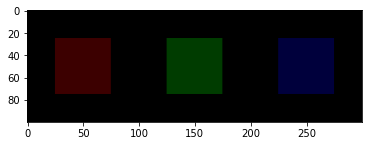

In [54]:
img = np.zeros([100, 300, 3], dtype=np.uint8)

img[25:75, 25:75, 0] = 60
img[25:75, 125:175, 1] = 60
img[25:75, 225:275, 2] = 60
plt.imshow(img)

### Remapeando os valores da imagem para o intervalo [0, 255]

Muitas vezes, após algumas operações os valores da imagem não estão mais no intervalo [0, 255]. Nessas situações, precisamos remapear os valores para salvar em um arquivo.

In [46]:
img = plt.imread('flower_grayscale2.tiff')
img = img.astype(float)
img_log = np.log(img+1)
image_info(img_log)

Tamanho: (755, 800)
Tipo de dado: float64
Menor valor: 1.9459101490553132
Maior valor: 5.545177444479562
Valores únicos: 250


In [48]:
def renormalize(img):
    
    img_norm = img - np.min(img)
    img_norm = img_norm/np.max(img_norm)
    img_norm = 255*img_norm
    img_norm = img_norm.astype(np.uint8)
    
    # O mesmo que acima em um único comando
    # img_norm = (255*(img-np.min(img))/(np.max(img)-np.min(img))).astype(np.uint8)
    
    return img_norm

img_norm = renormalize(img)
image_info(img_norm)

Tamanho: (755, 800)
Tipo de dado: uint8
Menor valor: 0
Maior valor: 255
Valores únicos: 250
